# More EDA

Here, we'll focus on exploring different encodings for the ligands, and especially for the proteins. 

In [16]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the data
DATA_DIR = "../data"
INTERIM_DIR = Path(DATA_DIR, "interim")
DATASET_PATH = Path(INTERIM_DIR, "reg_preprocessed_1.npz")

data = np.load(DATASET_PATH)
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

### PCA shows us that the relationship between chemical signatures and pKd is quite nonlinear.

It seems difficult to find clear separations for pKd after doing PCA on the signatures

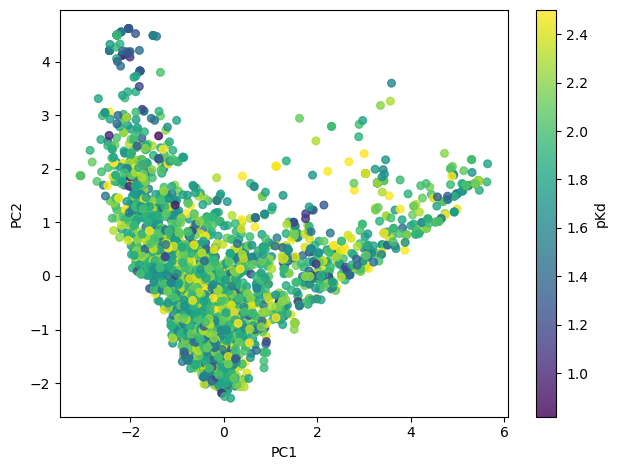

In [24]:
plot = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                   c=y_train, cmap='viridis', s=30, alpha=0.8)

# Add colorbar and labels
plt.colorbar(plot, label='pKd')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

### PCA does suggest that the train dataset can teach ligand features that generalize

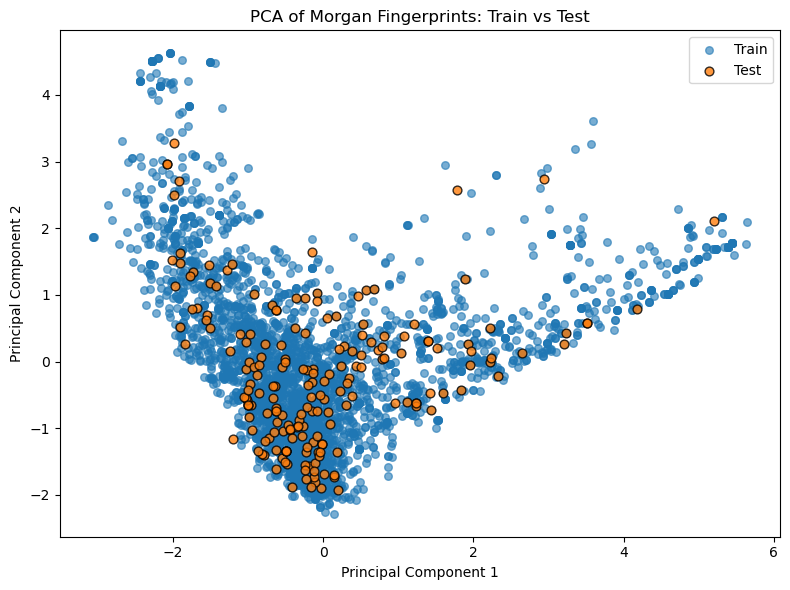

In [19]:
# Fit PCA on the training data only
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)  # <-- never fit twice!

# Combine for visualization
plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c='tab:blue', label='Train', alpha=0.6, s=30)

# Plot test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c='tab:orange', label='Test', alpha=0.8, s=40, edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Morgan Fingerprints: Train vs Test')
plt.legend()
plt.tight_layout()
plt.show()